# Entrenar capa convolucional

En esta práctica entrenaremos una capa convolucional para que trate de encontrar los pesos del kernel que permiten la detección de bordes horizontales. Esta es una actividad que retará los conocimientos que has adquirido hasta el momento. Deberás saber cual es el gradiente de cada peso en el kernel con respecto a la salida. Después acumular todos los incrementos que tiene el Kernel durante la convolución. 

Dimensiones de la imagen: (256, 256)
Tipo de datos de la matriz: uint8
Matriz de la imagen:
[[226 223 226 ... 230 232 211]
 [226 223 226 ... 230 232 211]
 [226 224 226 ... 221 216 185]
 ...
 [ 90  92  97 ... 140 158 162]
 [ 86  92  95 ... 154 171 171]
 [ 83  94  95 ... 167 178 183]]


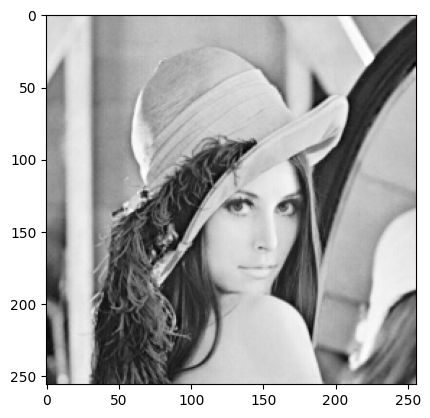

In [7]:
# Paquetes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import nni

ruta_imagen = "files/Lenna.png"
imagen_pil = Image.open(ruta_imagen)
imagen_numpy = np.array(imagen_pil)
array_transposed = imagen_numpy.transpose((2, 0, 1))
red_channel = array_transposed[0]
print("Dimensiones de la imagen:", red_channel.shape)
print("Tipo de datos de la matriz:", red_channel.dtype)
print("Matriz de la imagen:")
print(red_channel)

plt.imshow(red_channel, cmap='gray')

# Imagen objetivo

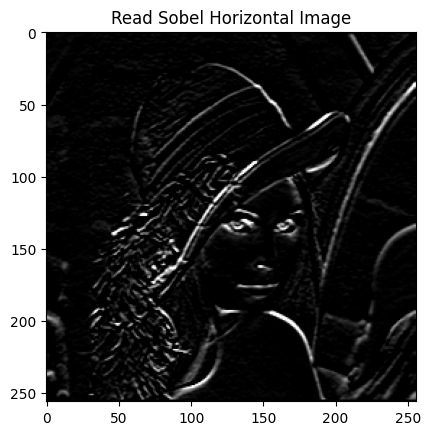

Dimensiones de la imagen Sobel: (256, 256)
Tipo de datos de la matriz Sobel: uint8
Minimo valor de la matriz Sobel: 0
Maximo valor de la matriz Sobel: 255


In [13]:
sobel_horizontal_image = Image.open('files/sobel_horizontal.png')
sobel_horizontal_image = np.array(sobel_horizontal_image)

# Display the read image
plt.imshow(sobel_horizontal_image, cmap='gray')
plt.title('Read Sobel Horizontal Image')
plt.show()

print("Dimensiones de la imagen Sobel:", sobel_horizontal_image.shape)
print("Tipo de datos de la matriz Sobel:", sobel_horizontal_image.dtype)
print("Minimo valor de la matriz Sobel:", np.min(sobel_horizontal_image))
print("Maximo valor de la matriz Sobel:", np.max(sobel_horizontal_image))

# Construir una capa convolucional


[[ 0.07759841  0.57031191 -0.40592342 -2.21876029 -2.08944331]
 [-0.22836717 -1.43920011  0.99023918 -1.89180112 -1.10988907]
 [-1.77067856  1.82195114 -0.53323897 -1.18817174 -0.50670773]
 [-0.11663855  1.04508846  1.06678724 -0.18693521 -0.43567029]
 [ 1.10810646  2.72986022  1.2311803  -2.48517679  1.39457383]]


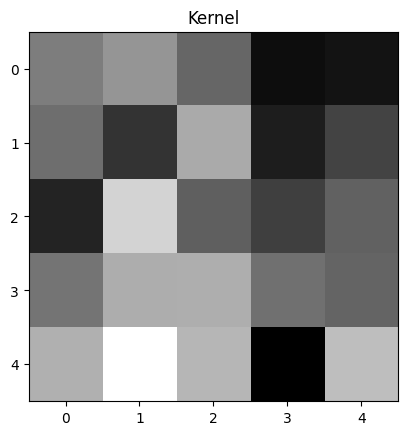

In [23]:
# Construir una matriz de 5x5 con valores aleatorios (Kernel)
K = np.random.normal(size=(5, 5))
print(K)

plt.imshow(K, cmap='gray')
plt.title('Kernel')
plt.show()


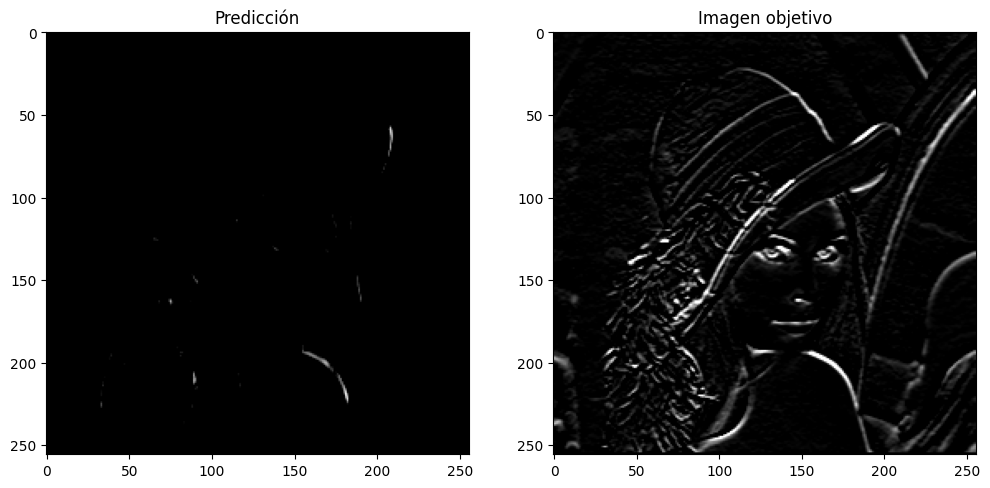

Dimensiones de la imagen predicción: (256, 256)
Tipo de datos de la matriz predicción: float64
Minimo valor de la matriz predicción: 0.0
Maximo valor de la matriz predicción: 539.0


In [24]:
# Definir pase frontal

prediccion = nni.ReLU(nni.correlacionCruzada(K, red_channel))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(prediccion, cmap='gray')
axs[0].set_title('Predicción')

axs[1].imshow(sobel_horizontal_image, cmap='gray')
axs[1].set_title('Imagen objetivo')

plt.show()

print("Dimensiones de la imagen predicción:", prediccion.shape)
print("Tipo de datos de la matriz predicción:", prediccion.dtype)
print("Minimo valor de la matriz predicción:", np.min(prediccion))
print("Maximo valor de la matriz predicción:", np.max(prediccion))

Todo apunta a que el kernel que se usó no está generando el resultado esperado. Tu tarea es actualizar el kernel de forma iterativa para que se ajuste a la salida. En este caso es suficiente solo el descenso por gradiente. No hay retropropagación por que solo tenemos una capa convolucional. ¿Serás capáz de generar un código que entrene el Kernel?

In [26]:
# Calcular el error cuadrático medio

def errorCuadraticoMedio(prediccion, objetivo):
    return np.mean((prediccion - objetivo) ** 2)

ECM = errorCuadraticoMedio(prediccion, sobel_horizontal_image)
print("Error cuadrático medio:", ECM)

Error cuadrático medio: 1162.1902160644531


In [ ]:
# Un tipo que te puedo dar es que el gradiente se calcula de forma particular para una posición de la salida.
# Por lo tanto se puede calcular el gradiente para cada posición de la salida y luego sumar los gradientes de cada posición 
# para obtener el gradiente total.
# Puedes escribir un solo codigo pero mi recomendación es usar funciones auxiliares para calcular el gradiente en una posición

# Calcular el gradiente del error cuadrático medio con respecto a la predicción en la posición (i, j)
# predicción es la matriz de la predicción
# objetivo es la matriz de la imagen objetivo
# i es la fila de la posición en la que se calcula el gradiente
# j es la columna de la posición en la que se calcula el grad
# u es la fila del kernel
# v es la columna del kernel
def gradienteConv(prediccion, objetivo, i, j, u, v):
    pass

# Calcular el incremento en los pesos del kernel
def incrementoKernelEnPixel(K, i, j, tasa_aprendizaje):
    # Deberás recorrer el kernel y calcular el incremento en cada posición
    # en cada posición deberas llamar a la función gradienteConv
    pass

# Como la convolución es una operación que repite para cada posición de la salida, cada posición de la salida 
# contribuye al gradiente total. Por lo tanto, para calcular el gradiente total, deberás sumar los incrementos
def incrementoTotalKernel(prediccion, objetivo, tasa_aprendizaje):
    # para cada posición de la salida, deberás calcular un incremento en el kernel
    #  y acumular los incrementos
    pass



Si estan bien implementadas tus funciones podrás realizar un ciclo por épocas para entrenar la capa convolucional. Si resulta que tu kernel entrenado obtiene una salida a nuesto valor esperado habrás realizado una enorme hazaña.